# Python for (open) Neuroscience

_Lecture 1.3_ - More on `pandas`

Luigi Petrucco

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/lectures/Lecture1.3_More-pandas.ipynb)

## Announcements


## Summary on `pandas`

In [3]:
import pandas as pd

URL = "https://raw.githubusercontent.com/vigji/python-cimec-2024/main/lectures/files/stimulus_log.csv"
df = pd.read_csv(URL)

df.head()

,Radius,Theta,Direction,Timestamp
0,5,3.141500,1,2023-12-17T12:23:48.2339968+01:00
1,4,2.094395,1,2023-12-17T12:24:09.2596608+01:00
2,5,3.141500,2,2023-12-17T12:24:16.2907776+01:00
3,5,3.769911,2,2023-12-17T12:24:29.2541696+01:00
4,5,3.141500,1,2023-12-17T12:24:36.2617216+01:00


### Create `pd.DataFrames`

### Reading from files

Many (most?) times we'll be reading directly from a file (a `.csv`, a `.xlsx`...)

In [125]:
import pandas as pd 

# For .csv files, we use the read_csv method.
# In this notebook we read from the web; if it was a file from your pc, you'd pass the filename
# instead of the URL. read_csv takes a bunch of inputs about how your file is formatted

URL = "https://raw.githubusercontent.com/vigji/python-cimec-2024/main/lectures/files/stimulus_log.csv"
df = pd.read_csv(URL)

df.head()  # this will show only the first rows!

,Radius,Theta,Direction,Timestamp
0,5,3.141500,1,2023-12-17T12:23:48.2339968+01:00
1,4,2.094395,1,2023-12-17T12:24:09.2596608+01:00
2,5,3.141500,2,2023-12-17T12:24:16.2907776+01:00
3,5,3.769911,2,2023-12-17T12:24:29.2541696+01:00
4,5,3.141500,1,2023-12-17T12:24:36.2617216+01:00


## From dictionary of lists/arrays

Tipically, we create a dataframe from a dictionary of arrays/lists, where every entry is a column:

In [5]:
dict_array = {"int_col": [1, 2, 3, 6], 
                  "float_col": [4., 5., .6],
                  "a_constant_val": 1,
                  "str_col": ["a", "b", "c"]}

pd.DataFrame(dict_array)

ValueError: All arrays must be of the same length

 or from a list of dictionaries, where every entry is a row:

In [81]:
pd.DataFrame([dict(int_col=1, float_col=4., str_col="a"),
              dict(int_col=2, float_col=5., str_col="b"),
              dict(int_col=3, float_col=.6, str_col="c")])

,int_col,float_col,str_col
0,1,4.0,a
1,2,5.0,b
2,3,0.6,c


## Increment existing dataframes

### Add new columns

We can add new columns to a dataframe:

In [7]:
import numpy as np

df = pd.DataFrame(np.random.rand(3, 3), columns=["a", "b", "c"], index=["row1", "row2", "row3"])
df

,a,b,c
row1,0.318290,0.630369,0.393886
row2,0.730193,0.111823,0.916474
row3,0.745462,0.644797,0.650122


To add data, we can use any multi-element varable: `list`s, `array`s...

In [127]:
# The length of the assignment has to match the length of the dataframe:
df["a_new_column"] = ["a", "b", "c"]
df

,a,b,c,a_new_column
row1,0.794154,0.340368,0.489196,a
row2,0.699751,0.768766,0.752301,b
row3,0.343104,0.366393,0.770178,c


In [128]:
# We can also assign a single value to fill the whole column with the same content:
df["new_boring_column"] = 42
df

,a,b,c,a_new_column,new_boring_column
row1,0.794154,0.340368,0.489196,a,42
row2,0.699751,0.768766,0.752301,b,42
row3,0.343104,0.366393,0.770178,c,42


### Add new rows

We can add new rows to a dataframe (more rare). In this case we use concatenation:

In [8]:
df1 = pd.DataFrame(dict(col1=[99, 95, 92],
                        col2=[95, 90, 99]))
df1

,col1,col2
0,99,95
1,95,90
2,92,99


In [10]:
# Create another dataframe:
df2 = pd.DataFrame(dict(col1=[100],
                        col2=[101]))
df2

,col1,col2
0,100,101


In [14]:
# Concat dataframes
pd.concat([df1, df2])

,col1,col2
0,99,95
1,95,90
2,92,99
0,100,101


Note how indexes match the indexes of the original arrays! If we want, we can reassign it:

In [132]:
pd.concat([df1, df2]).reset_index()

,index,col1,col2
0,0,99,95
1,1,95,90
2,2,92,99
3,0,100,101


(Practicals 1.3.0)

### `pd.DataFrame`'s methods

`pd.DataFrame`s and `pd.Series` have many, many methods!

It is actually way too many to cover in a single lecture! It is more important to know that they exist, and to know how to find them! (google, stackoverflow, pandas documentation, chatGPT...)

### Methods to change the df content

Methods to drop rows/columns:

In [42]:
import pandas as pd

dict_array = {"int_col": [3, 2, 1, 1], 
              "float_col": [4., 5., .6, 7.], 
              "str_col": ["a", "d", "c", "a"]}
df = pd.DataFrame(dict_array)

df

,int_col,float_col,str_col
0,3,4.0,a
1,2,5.0,d
2,1,0.6,c
3,1,7.0,a


In [43]:
df.drop(columns=["int_col", "str_col"])  # drop columns

,float_col
0,4.0
1,5.0
2,0.6
3,7.0


In [44]:
df.drop(index=[0, 2])  # drop rows

,int_col,float_col,str_col
1,2,5.0,d
3,1,7.0,a


Methods to sort rows/columns:

In [41]:
df.sort_values(by="int_col") # sort by a column

,int_col,float_col,str_col
2,1,0.6,c
3,1,7.0,a
1,2,5.0,d
0,3,4.0,a


In [45]:
df.sort_values(by=["int_col", "float_col"])  # sort by multiple columns

,int_col,float_col,str_col
2,1,0.6,c
3,1,7.0,a
1,2,5.0,d
0,3,4.0,a


### Methods for statistics

In [46]:
# get a pandas sample dataset:
def get_meteo_dataset():
    URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m&start_date=2024-04-01&end_date=2024-04-20&format=csv"
    return pd.read_csv(URL, skiprows=5)

df = get_meteo_dataset()
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),wind_speed_10m (km/h),winddirection_10m (°)
0,2024-04-01T00:00,10.2,97,0.0,4.1,38
1,2024-04-01T01:00,10.0,94,0.0,6.0,65
2,2024-04-01T02:00,9.6,95,0.0,4.0,80
3,2024-04-01T03:00,9.2,95,0.0,5.4,82
4,2024-04-01T04:00,9.4,94,0.0,7.4,67


In [49]:
means = df["temperature_2m (°C)"].mean()
means

12.509583333333333

In [48]:
df["temperature_2m (°C)"].median()

12.149999999999999

In [39]:
df["temperature_2m (°C)"].std()

5.2788813732210365

We can directly produce a whole summary for columns of the dataset:

In [40]:
df[["temperature_2m (°C)", "precipitation (mm)", "wind_speed_10m (km/h)"]].describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (km/h)
count,480.000000,480.000000,480.000000
mean,12.509583,0.067500,11.407083
std,5.278881,0.264902,5.056387
min,0.700000,0.000000,1.600000
25%,9.000000,0.000000,7.300000
50%,12.150000,0.000000,10.500000
75%,16.000000,0.000000,14.900000
max,26.800000,2.100000,25.600000


### `pd.DataFrame`'s plotting methods

`pd.DataFrame`s and `pd.Series` have several plotting methods!

<Axes: >

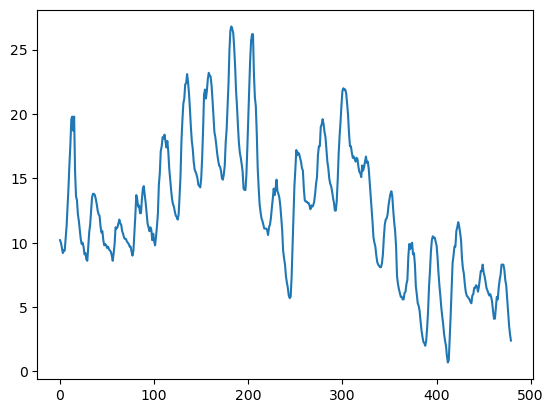

In [41]:
df["temperature_2m (°C)"].plot()

<Axes: >

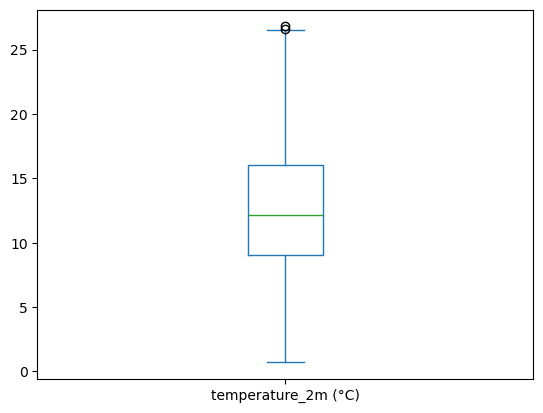

In [42]:
df["temperature_2m (°C)"].plot(kind="box")

<Axes: ylabel='Frequency'>

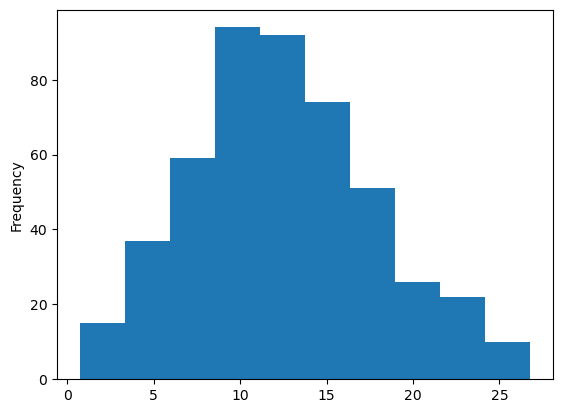

In [43]:
df["temperature_2m (°C)"].plot(kind="hist")

<Axes: xlabel='temperature_2m (°C)', ylabel='precipitation (mm)'>

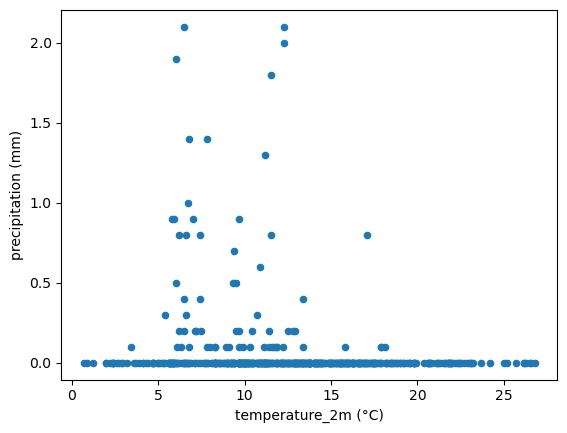

In [44]:
df.plot(kind="scatter", x="temperature_2m (°C)", y="precipitation (mm)")

### Methods to deal with missing data

As in numpy, we represent missing data by `NaN` (not a number).

In [51]:
import numpy as np

df = pd.DataFrame({"column_a": [0, 3, 1, 2, np.nan, 4, 10], 
                   "column_b": [7, 6, np.nan, 4, 5, 7, 8]})
df

,column_a,column_b
0,0.0,7.0
1,3.0,6.0
2,1.0,NaN
3,2.0,4.0
4,NaN,5.0
5,4.0,7.0
6,10.0,8.0


To deal with missing data, we can use `pd.DataFrame`'s interpolation methods. By default, it will use linear interpolation:

<Axes: >

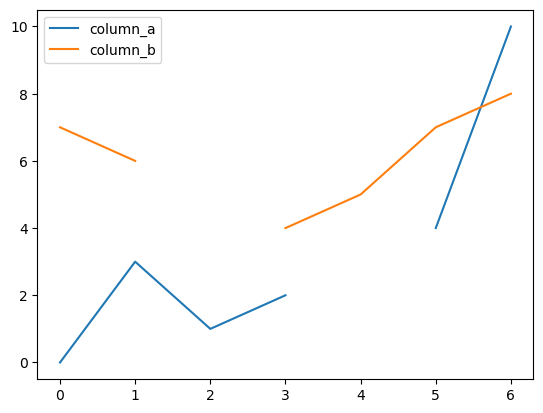

In [52]:
df.plot()

In [53]:
?df.interpolate

<Axes: >

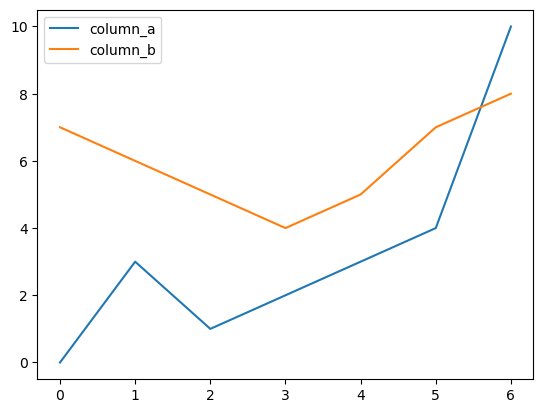

In [54]:
df.interpolate().plot()

(Practicals 1.3.1)

## Organize data in a dataframe

A very common scenario in data science is: how to organize our datasets?

In [16]:
# Imagine we have 4 experimental subjects; to each one we show a stimulus 3 times (trials); 
# during every trial, we measure 2 variables (eg, accuracy and speed)
n_subjects = 4
n_repetitions = 3

# We could represent the data entries for each stimulus as a dictionary, 
# and the data for all trials for a subject as a list of dictionaries:
subject_data = [{"accuracy":np.random.rand(), "speed":np.random.rand()} for _ in range(n_repetitions)]
subject_data

[{'accuracy': 0.8470531246048197, 'speed': 0.7909328530201921},
 {'accuracy': 0.8681903662097734, 'speed': 0.12141483750195237},
 {'accuracy': 0.6360187633292621, 'speed': 0.6860962357237326}]

In [17]:
# We could then pool the data for all subjects as a dictionary of lists of dictionaries:
all_subjects_data = dict()

for i in range(n_subjects):
    all_subjects_data[f"subj_{i}"] = \
        [{"accuracy":np.random.rand(), "speed":np.random.rand()} for _ in range(n_repetitions)]
all_subjects_data

{'subj_0': [{'accuracy': 0.8334701509639685, 'speed': 0.8335255203582217},
  {'accuracy': 0.22047986263511044, 'speed': 0.5003517240150298},
  {'accuracy': 0.5422543681679196, 'speed': 0.68844436706355}],
 'subj_1': [{'accuracy': 0.6892195685317982, 'speed': 0.4409711961446108},
  {'accuracy': 0.2472501352394637, 'speed': 0.4513066252583344},
  {'accuracy': 0.7288542100955676, 'speed': 0.9351710588119406}],
 'subj_2': [{'accuracy': 0.2705196067775386, 'speed': 0.431741185792221},
  {'accuracy': 0.3013894600385709, 'speed': 0.29999425019948844},
  {'accuracy': 0.6566833099142121, 'speed': 0.612239227775612}],
 'subj_3': [{'accuracy': 0.4606952901711916, 'speed': 0.47340287928353475},
  {'accuracy': 0.011102375862298008, 'speed': 0.3068648187021741},
  {'accuracy': 0.17649808041893766, 'speed': 0.4032187032055008}]}

This is now organized but very nested! it is not easy to perform statistics on it.

In [18]:
# Imagine we want to average the results across all subjects for variable_1:
means = []
for subject_results in all_subjects_data.values():
    for result in subject_results:
        means.append(result["speed"])
np.mean(means)

0.5314359630508515

When we organize data in pandas dataframes, there is an important principle to keep in mind:

**keep them as flat as possible**

`flat` = opposite of nested

`nested` = lists of dictionaries of lists of dictionaries of dataframes of...



Remember!


    🪷 The Zen of Python 🪷
        
        Flat is better than nested

In [21]:
# We can turn the data into a dataframe (does not matter how we do it here! this is just an ugly example)
flat_list_of_dicts = []

for sub in all_subjects_data.keys():
    for n_rep in range(n_repetitions):
        trial_dict = all_subjects_data[sub][n_rep]
        trial_dict.update({"subject": sub, "repetition": n_rep})
        
        flat_list_of_dicts.append(trial_dict)
                    
trials_df = pd.DataFrame(flat_list_of_dicts)
trials_df


,accuracy,speed,subject,repetition
0,0.833470,0.833526,subj_0,0
1,0.220480,0.500352,subj_0,1
2,0.542254,0.688444,subj_0,2
3,0.689220,0.440971,subj_1,0
4,0.247250,0.451307,subj_1,1
5,0.728854,0.935171,subj_1,2
6,0.270520,0.431741,subj_2,0
7,0.301389,0.299994,subj_2,1
8,0.656683,0.612239,subj_2,2
9,0.460695,0.473403,subj_3,0


We can now easily perform statistics on the data:

In [74]:
trials_df["speed"].mean()

0.5109582589857121

### Principles for organizing `pandas` dataframes

Keep in the same dataset all the data of the same type you have across groups (such as subjects). 

If you load lists of dataframes concatenate before working on them!

Consider having multiple dataframes to describe different aspects of your experiment. For example:
- a `subject_dataframe` with the info on your subjects
- a `trials_dataframe` with the trial responses across subjects

And keep consistent ids / nomenclature to easily work over both!

Example:

In [25]:
# Let's build a subjects dataframe for the experiment above:
np.random.seed(42)
subjects_df = pd.DataFrame({"sex":np.random.choice(["F", "M"], size=n_subjects),
                            "handedness": np.random.choice(["left", "right"], size=n_subjects),
                            "age": np.random.randint(20, 40, size=n_subjects)})
subjects_df.index = [f"subj_{i}" for i in range(n_subjects)]
subjects_df

,sex,handedness,age
subj_0,F,left,26
subj_1,M,right,38
subj_2,F,left,30
subj_3,F,left,30


We can now easily filter the subjects we want to work on based on categories:

In [26]:
selected_subjects_df = subjects_df[(subjects_df["sex"] == "F") & (subjects_df["age"] >=30)]
selected_subjects_df

,sex,handedness,age
subj_2,F,left,30
subj_3,F,left,30


In [27]:
selected_subjects_df.index

Index(['subj_2', 'subj_3'], dtype='object')

And restrain our analysis of the `trials_df` to these subjects :

In [34]:
# Here, we'll use another handy pandas method: `isin()`:

selection = trials_df["subject"].isin(selected_subjects_df.index)
selection


0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
Name: subject, dtype: bool

In [37]:
trials_df.loc[selection, "speed"].mean()

0.4212435108264218

## When not to use `pandas`

You do not always need pandas dataframes! E.g., it is not efficient with many columns.

Many times your raw data (ephys, imaging...) can live in numpy array and you work in `pandas` only with  derived quantities.

(Practicals 1.3.2)